# <center>Лабораторна робота №3. <br> Візуальний аналіз даних про публікації на сайті Хабрахабр</center>

**Заповніть код в клітинках**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
df = pd.read_csv('lab3/data/howpop_train.csv')

In [111]:
df.shape

(134137, 17)

In [112]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Позбавимося відразу від змінних, назви яких закінчуються на `_lognorm` (потрібні для змагань на Kaggle). Виберемо їх за допомогою `filter()` і видаимо `drop`-ом:

In [113]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столвбці 
        inplace = True) # позбавляє від необхідності зберігати датасет

In [114]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [115]:
df.describe(include = ['object', 'bool'] # бінарні і категоріальні змінні
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/18284/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [116]:
# налаштування зовнішнього вигляду графіків в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

Стовбець **`published`** (час публікації) містить рядки. Щоб ми мали змогу працювати з цими даними як з датою/часом публікації, приведемо їх до типу `datetime`:

In [117]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


Створимо декілька стовбців на основі даних про час публікації:

In [118]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

-----
Відтепер Ваша черга. В кожному пункті пропонується побудувати картинку і з її допомогою відповісти на питання. Звичано, можна спробувати відповісти на всі питання лише використовуючи Pandas, без картинок, але ми радимо Вам потренуватися будувати (красиві) візуалізації.   

## 1\. Побудуйте візуалізацію і з її допомогою потрібно визначити, в якому місяці (і якого року) було більше всього публікацій?

* березень 2016
* березень 2015
* квітень 2015
* квітень 2016

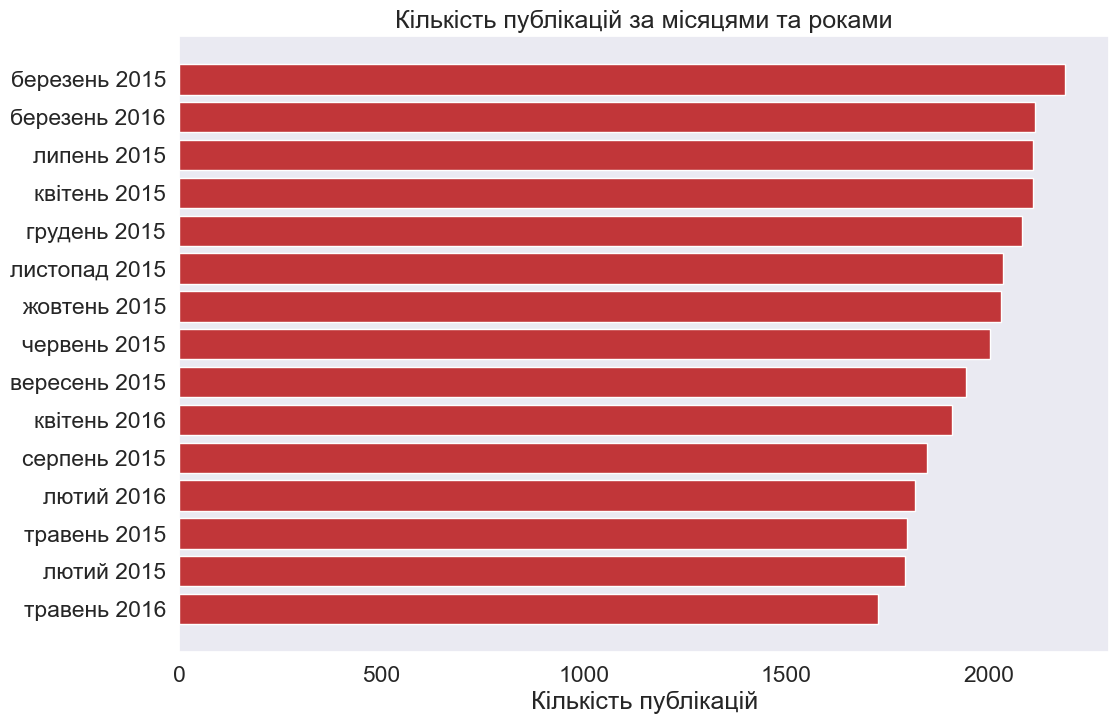

З графіку вище видно, що набільше публікацій було зроблено в березні 2015


In [119]:
month_names = ['січень', 'лютий', 'березень', 'квітень', 'травень', 'червень', 
    'липень', 'серпень', 'вересень', 'жовтень', 'листопад', 'грудень']

monthly_counts = df.groupby(['year', 'month']).size().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
top_months = monthly_counts.head(15)
plt.barh(range(len(top_months)), top_months.values)
plt.yticks(range(len(top_months)), [f"{month_names[month-1]} {year}" for year, month in top_months.index])
plt.title('Кількість публікацій за місяцями та роками')
plt.xlabel('Кількість публікацій')
plt.gca().invert_yaxis()
plt.show()

print("З графіку вище видно, що набільше публікацій було зроблено в березні 2015")

## 2\. Проаналізуйте публікації в місяці з попереднього питання. Виконайте візуалізацію, що допоможе вибрати один чи декілька варіантів з переліку:

* Один чи декілька днів сильно виділяються із загальної картини
* На хабрі _завжди_ більше статей, ніж на гіктаймсі
* По суботам на гіктаймс і на хабрахабр публікують приблизно одинакову кількість статей

Підказки: побудуйте графік залежності числа публікацій від дня; використовуйте параметр `hue`; не переймайтесь сильно з відповідями і не шукайте прихованого змісту :)

In [120]:
march_2015 = df[(df['year'] == 2015) & (df['month'] == 3)]

print(f"Унікальні домени: {march_2015['domain'].unique()}")

Унікальні домени: ['habrahabr.ru' 'geektimes.ru']


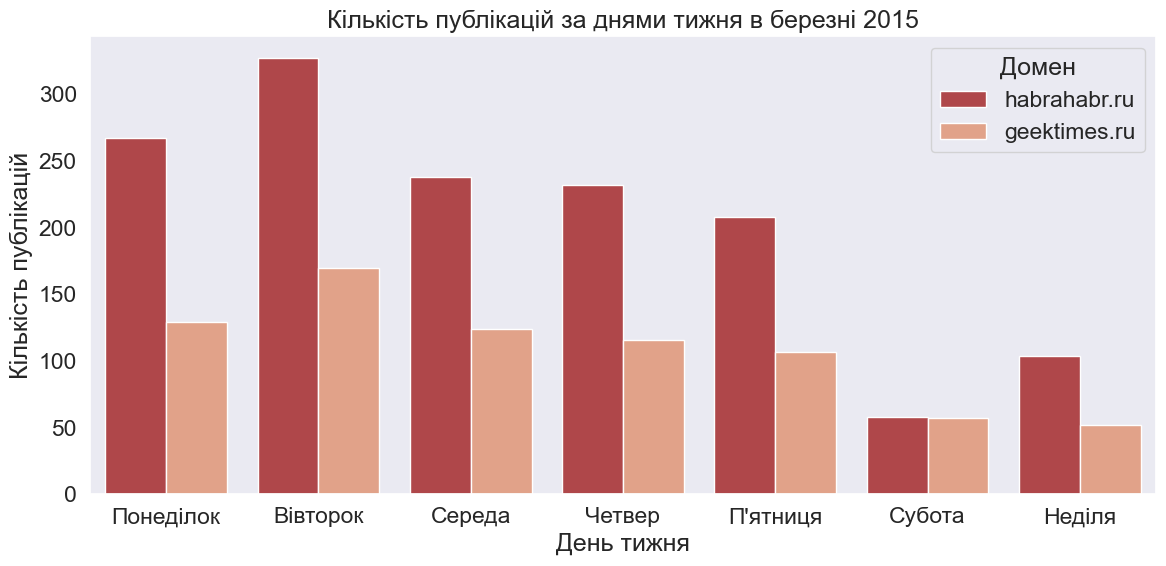

In [121]:
plt.figure(figsize=(12, 6))
sns.countplot(data=march_2015, x='dayofweek', hue='domain')
plt.title('Кількість публікацій за днями тижня в березні 2015')
plt.xlabel('День тижня')
plt.ylabel('Кількість публікацій')
plt.xticks(range(7), ['Понеділок', 'Вівторок', 'Середа', 'Четвер', 'П\'ятниця', 'Субота', 'Неділя'])
plt.legend(title='Домен')
plt.tight_layout()
plt.show()

На основі графіку та даних вище можна зробити наступні висновки:

1. **Один чи декілька днів сильно виділяються із загальної картини** - ТАК, видно що на вихідних кількість публікацій значно менша, ніж в будні дні.

2. **На хабрі _завжди_ більше статей, ніж на гіктаймсі** - НІ, з графіку видно, що в суботу кількість статей приблизно однакова. Аби точно визначити цей момент варто подивитись точні цифри, а не візуалізацію, але оскільки в нас лаба саме по візуалізації, то ми цього робити не будемо :3

3. **По суботам на гіктаймс і на хабрахабр публікують приблизно одинакову кількість статей** - ТАК, з даних видно що в суботу кількість публікацій на обох сайтах приблизно рівна


## 3\. Зробіть візуалізацію, щоб визначити коли найкраще всього опублікувати статтю. Оберіть з варіантів відповідей:

* Більше всього переглядів набирають статті, опубліковані в 12 годин дня
* В опублікованих о 10-й ранку постів більше всього коментарів
* Більше всього переглядів набирають статті, опубліковані в 6 годин ранку
* Максимальне число коментарів на гіктаймсі набрала стаття, опублікована в 9 годин вечора
* На хабрі денні статті комментують частіше, ніж вечірні

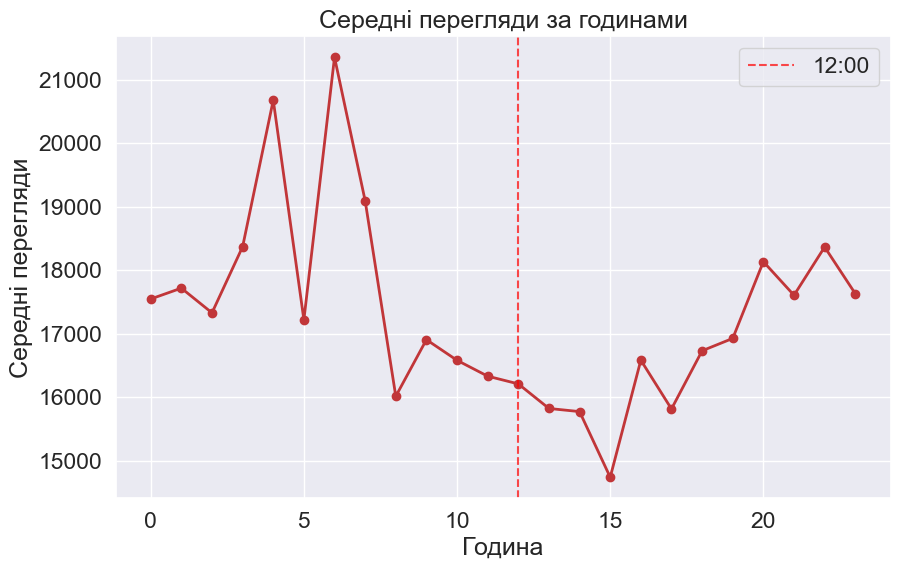

З графіку видно, що твердження 'Більш всього переглядів набирають статті, опубліковані в 12 годин дня' неправдиве.
Більш всього переглядів набирають статті, опубліковані приблизно о 6-ій годині ранку


In [127]:
hourly_views = df.groupby('hour')['views'].mean()
plt.figure(figsize=(10, 6))
plt.plot(hourly_views.index, hourly_views.values, marker='o', linewidth=2)
plt.title('Середні перегляди за годинами')
plt.xlabel('Година')
plt.ylabel('Середні перегляди')
plt.grid(True)
plt.axvline(x=12, color='red', linestyle='--', alpha=0.7, label='12:00')
plt.legend()
plt.show()

print(f"З графіку видно, що твердження 'Більш всього переглядів набирають статті, опубліковані в 12 годин дня' неправдиве.")
print(f"Більш всього переглядів набирають статті, опубліковані приблизно о 6-ій годині ранку")


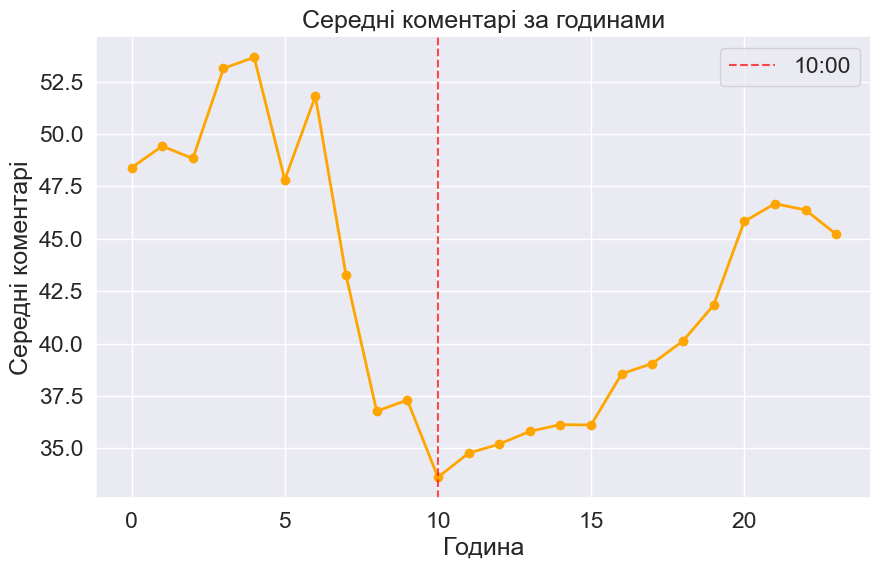

З графіку видно, що твердження 'В опублікованих о 10-й ранку постів більше всього коментарів' неправдиве
Більш всього коментарів набирають статті, опубліковані приблизно о 4-ій годині ранку


In [128]:
hourly_comments = df.groupby('hour')['comments'].mean()
plt.figure(figsize=(10, 6))
plt.plot(hourly_comments.index, hourly_comments.values, marker='o', linewidth=2, color='orange')
plt.title('Середні коментарі за годинами')
plt.xlabel('Година')
plt.ylabel('Середні коментарі')
plt.grid(True)
plt.axvline(x=10, color='red', linestyle='--', alpha=0.7, label='10:00')
plt.legend()
plt.show()

print(f"З графіку видно, що твердження 'В опублікованих о 10-й ранку постів більше всього коментарів' неправдиве")
print(f"Більш всього коментарів набирають статті, опубліковані приблизно о 4-ій годині ранку")


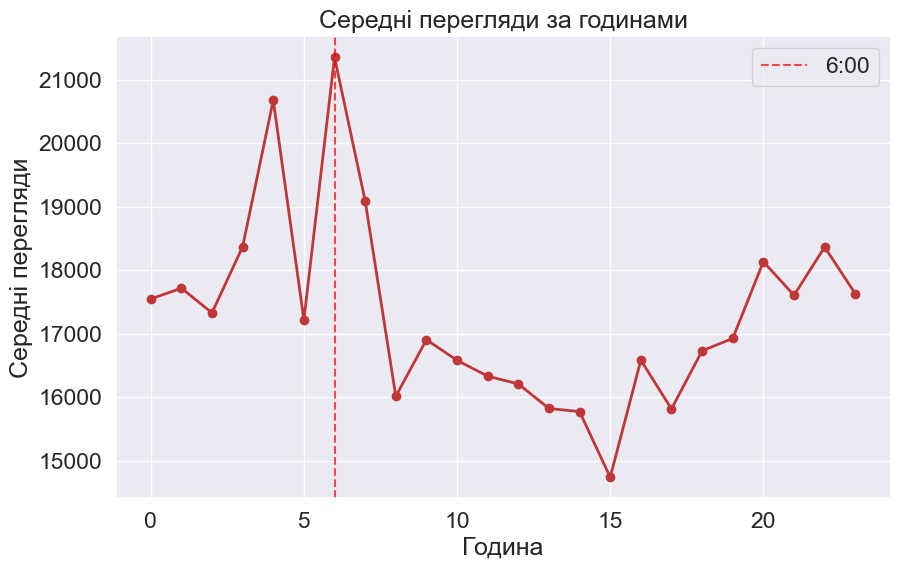

З графіку видно, що твердження 'Більш всього переглядів набирають статті, опубліковані в 6 годині ранку' правдиве.


In [129]:
plt.figure(figsize=(10, 6))
plt.plot(hourly_views.index, hourly_views.values, marker='o', linewidth=2)
plt.title('Середні перегляди за годинами')
plt.xlabel('Година')
plt.ylabel('Середні перегляди')
plt.grid(True)
plt.axvline(x=6, color='red', linestyle='--', alpha=0.7, label='6:00')
plt.legend()
plt.show()

print(f"З графіку видно, що твердження 'Більш всього переглядів набирають статті, опубліковані в 6 годині ранку' правдиве.")


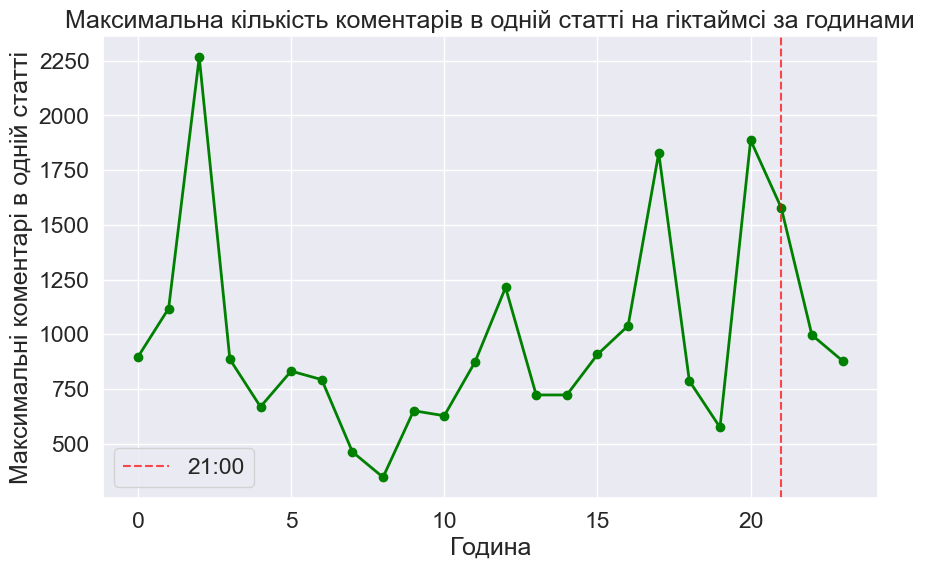

З графіку видно, що твердження 'Максимальне число коментарів на гіктаймсі набрала стаття, опублікована в 9 годин вечора' неправдиве
Максимальне число коментарів на гіктаймсі набрала стаття, опублікована приблизно о 2ій годин ранку


In [133]:
geektimes_data = df[df['domain'] == 'geektimes.ru']
max_comments_per_hour = geektimes_data.groupby('hour')['comments'].max()
plt.figure(figsize=(10, 6))
plt.plot(max_comments_per_hour.index, max_comments_per_hour.values, marker='o', linewidth=2, color='green')
plt.title('Максимальна кількість коментарів в одній статті на гіктаймсі за годинами')
plt.xlabel('Година')
plt.ylabel('Максимальні коментарі в одній статті')
plt.grid(True)
plt.axvline(x=21, color='red', linestyle='--', alpha=0.7, label='21:00')
plt.legend()
plt.show()

print("З графіку видно, що твердження 'Максимальне число коментарів на гіктаймсі набрала стаття, опублікована в 9 годин вечора' неправдиве")
print("Максимальне число коментарів на гіктаймсі набрала стаття, опублікована приблизно о 2ій годин ранку")

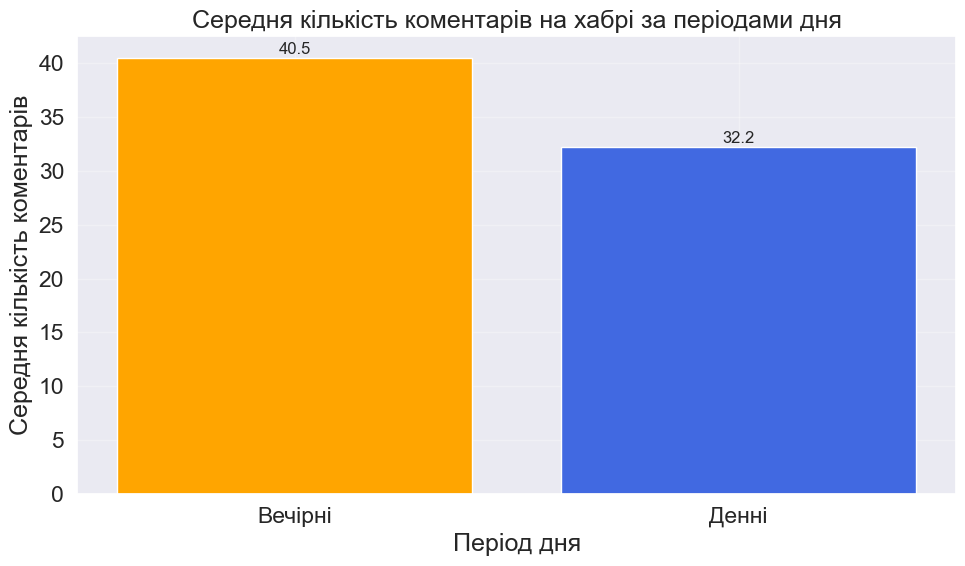

З графіку видно, що твердження 'На хабрі денні статті комментують частіше, ніж вечірні.' неправдиве


In [ ]:
habr_data = df[df['domain'] == 'habrahabr.ru'].copy()

habr_data['time_period'] = habr_data['hour'].apply(lambda x: 'Денні' if 6 <= x < 18 else 'Вечірні')

comments_by_period = habr_data.groupby('time_period')['comments'].mean()

plt.figure(figsize=(10, 6))
bars = plt.bar(comments_by_period.index, comments_by_period.values, color=['#FFA500', '#4169E1'])
plt.title('Середня кількість коментарів на хабрі за періодами дня')
plt.ylabel('Середня кількість коментарів')
plt.xlabel('Період дня')

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}', ha='center', va='bottom', fontsize=12)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("З графіку видно, що твердження 'На хабрі денні статті комментують частіше, ніж вечірні.' неправдиве")

## 4\.  Напишіть код візуалізації даних, що визначити, кого з топ-20 авторів частіше всього мінусують? Обирайте з варіантів відповіді:

* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

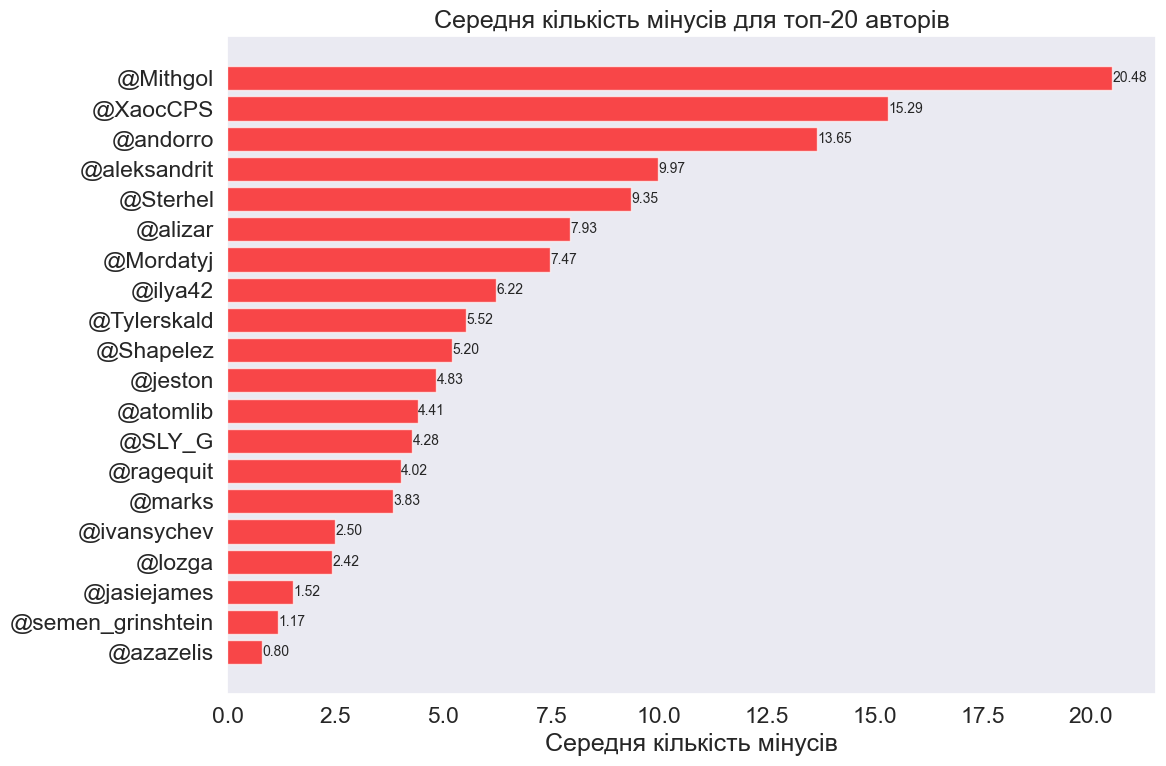

З графіку видно, що найчастіше мунусують автора @Mithgol


In [41]:
top_authors = df['author'].value_counts().head(20)

author_minuses = df[df['author'].isin(top_authors.index)].groupby('author')['votes_minus'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(author_minuses)), author_minuses.values, color='red', alpha=0.7)
plt.yticks(range(len(author_minuses)), author_minuses.index)
plt.title('Середня кількість мінусів для топ-20 авторів')
plt.xlabel('Середня кількість мінусів')
plt.gca().invert_yaxis()

for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("З графіку видно, що найчастіше мунусують автора @Mithgol")

## 5\. Порівняйте суботи і понеділки

Чи правда, що по суботам автори пишуть в основному вдень, а по понедількам — в основному вечером?

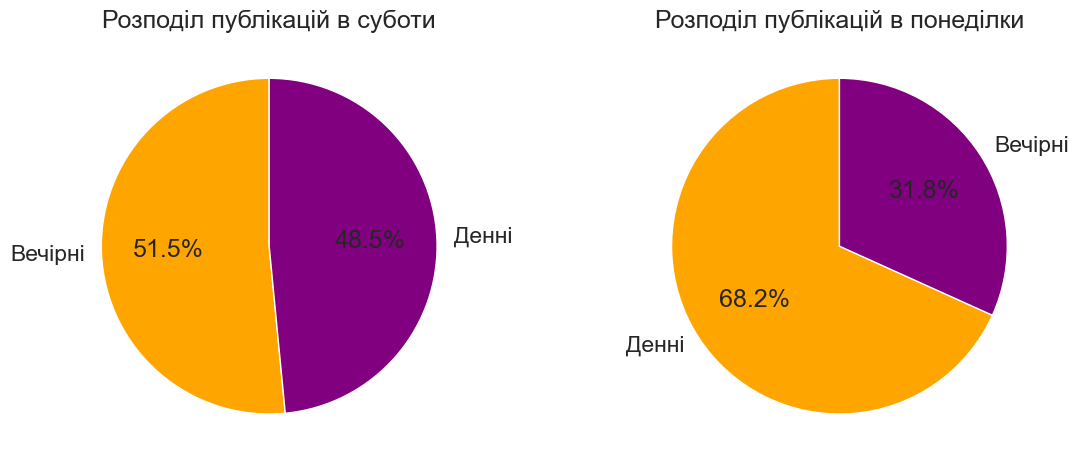

З графіків видно, що твердежння, що:
- по суботам автори пишуть в основному вдень - неправдиве
- по понеділкам автори пишуть в основному вечером - неправдиве


In [49]:
saturday_data_copy = df[df['dayofweek'] == 6].copy()
monday_data_copy = df[df['dayofweek'] == 1].copy()

saturday_data_copy['time_period'] = saturday_data_copy['hour'].apply(lambda x: 'Денні' if 6 <= x < 18 else 'Вечірні')
monday_data_copy['time_period'] = monday_data_copy['hour'].apply(lambda x: 'Денні' if 6 <= x < 18 else 'Вечірні')

saturday_periods = saturday_data_copy['time_period'].value_counts()
monday_periods = monday_data_copy['time_period'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.pie(saturday_periods.values, labels=saturday_periods.index, autopct='%1.1f%%', 
        colors=['orange', 'purple'], startangle=90)
ax1.set_title('Розподіл публікацій в суботи')

ax2.pie(monday_periods.values, labels=monday_periods.index, autopct='%1.1f%%', 
        colors=['orange', 'purple'], startangle=90)
ax2.set_title('Розподіл публікацій в понеділки')

plt.tight_layout()
plt.show()


print("З графіків видно, що твердежння, що:")
print("- по суботам автори пишуть в основному вдень - неправдиве")
print("- по понеділкам автори пишуть в основному вечером - неправдиве")